In [1]:
using LinearAlgebra
using PyPlot
using Random
using Statistics
using Printf
using JLD2, FileIO
using ProgressMeter
include("RealStorkey.jl");
rng = MersenneTwister(1234);

#### $N$ is the dimension of the memory elements and $P$ the number of fundamental memories. 

In [18]:
N = 100;
P = 60;

#### $\mathtt{NoiseValues}$ is the vector of noise levels, $\mathtt{Nsim}$ the number of simulations and $\mathtt{it}_{\mathtt{max}}$ the maximum number of iterations for the Hopfield neural network. 

In [19]:
pr = range(0,1,length = 50)
NoiseValues = copy(pr)
Nnoise = length(pr)

## Noise Vector
Success_0 = zeros(Int64,(1,length(pr)));

### Number of Simulations
Nsim = 300

### Number of maximum iterations for the HNN model
it_max =1000

### Rule Name
rule = "S1"

"S1"

#### Recall Experiment

In [20]:
# First Order W matrix
Wc = zeros(N,N)
@showprogress for s = 1:Nsim

    U = 2*rand(rng,Bool,(N,P)).-1;

    Wc = RealStorkey.storkey_learning(U,RealStorkey.first)


    for i = 1:Nnoise

        xr = 1.0*copy(U[:,1]) .* (1 .- 2*(rand(N,1) .< NoiseValues[i]))
        
        y = RealStorkey.Asy(Wc,xr,it_max)
        
        Error = norm(U[:,1]-y)

        if Error<1.e-4
            Success_0[i] = Success_0[i] + 1
        end
        

    end
    
@save "JLDs/S160.jld2" NoiseValues Success_0 Nsim P
end



Progress: 100%|█████████████████████████████████████████| Time: 0:00:52


#### Creating the plot


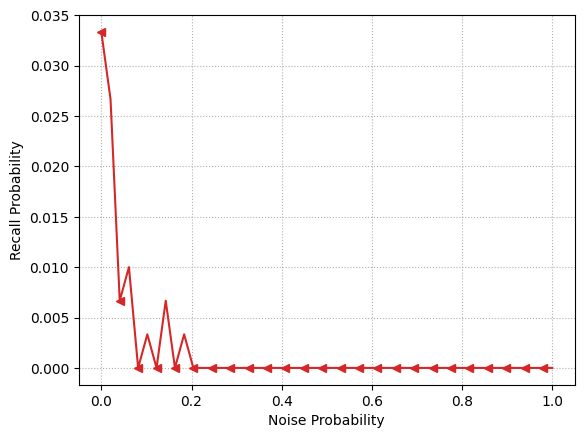

In [21]:
@load "JLDs/S160.jld2"
plot(NoiseValues,Success_0[1,:]/Nsim,linewidth=1.5, color="#d62728",marker="<",markevery=(0,2),label="Asy-HNN "*rule)

grid(linestyle="dotted")
xlabel("Noise Probability")
ylabel("Recall Probability")

### Loading String Name
name = "Binary Hopfield Neural Network"

savefig("Figures/S160.eps")
savefig("Figures/S160.eps")